In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from plotnine import *

In [2]:
diabetes = load_diabetes()

In [3]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [4]:
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

In [5]:
pd.concat([df.head(), df.tail()])

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064


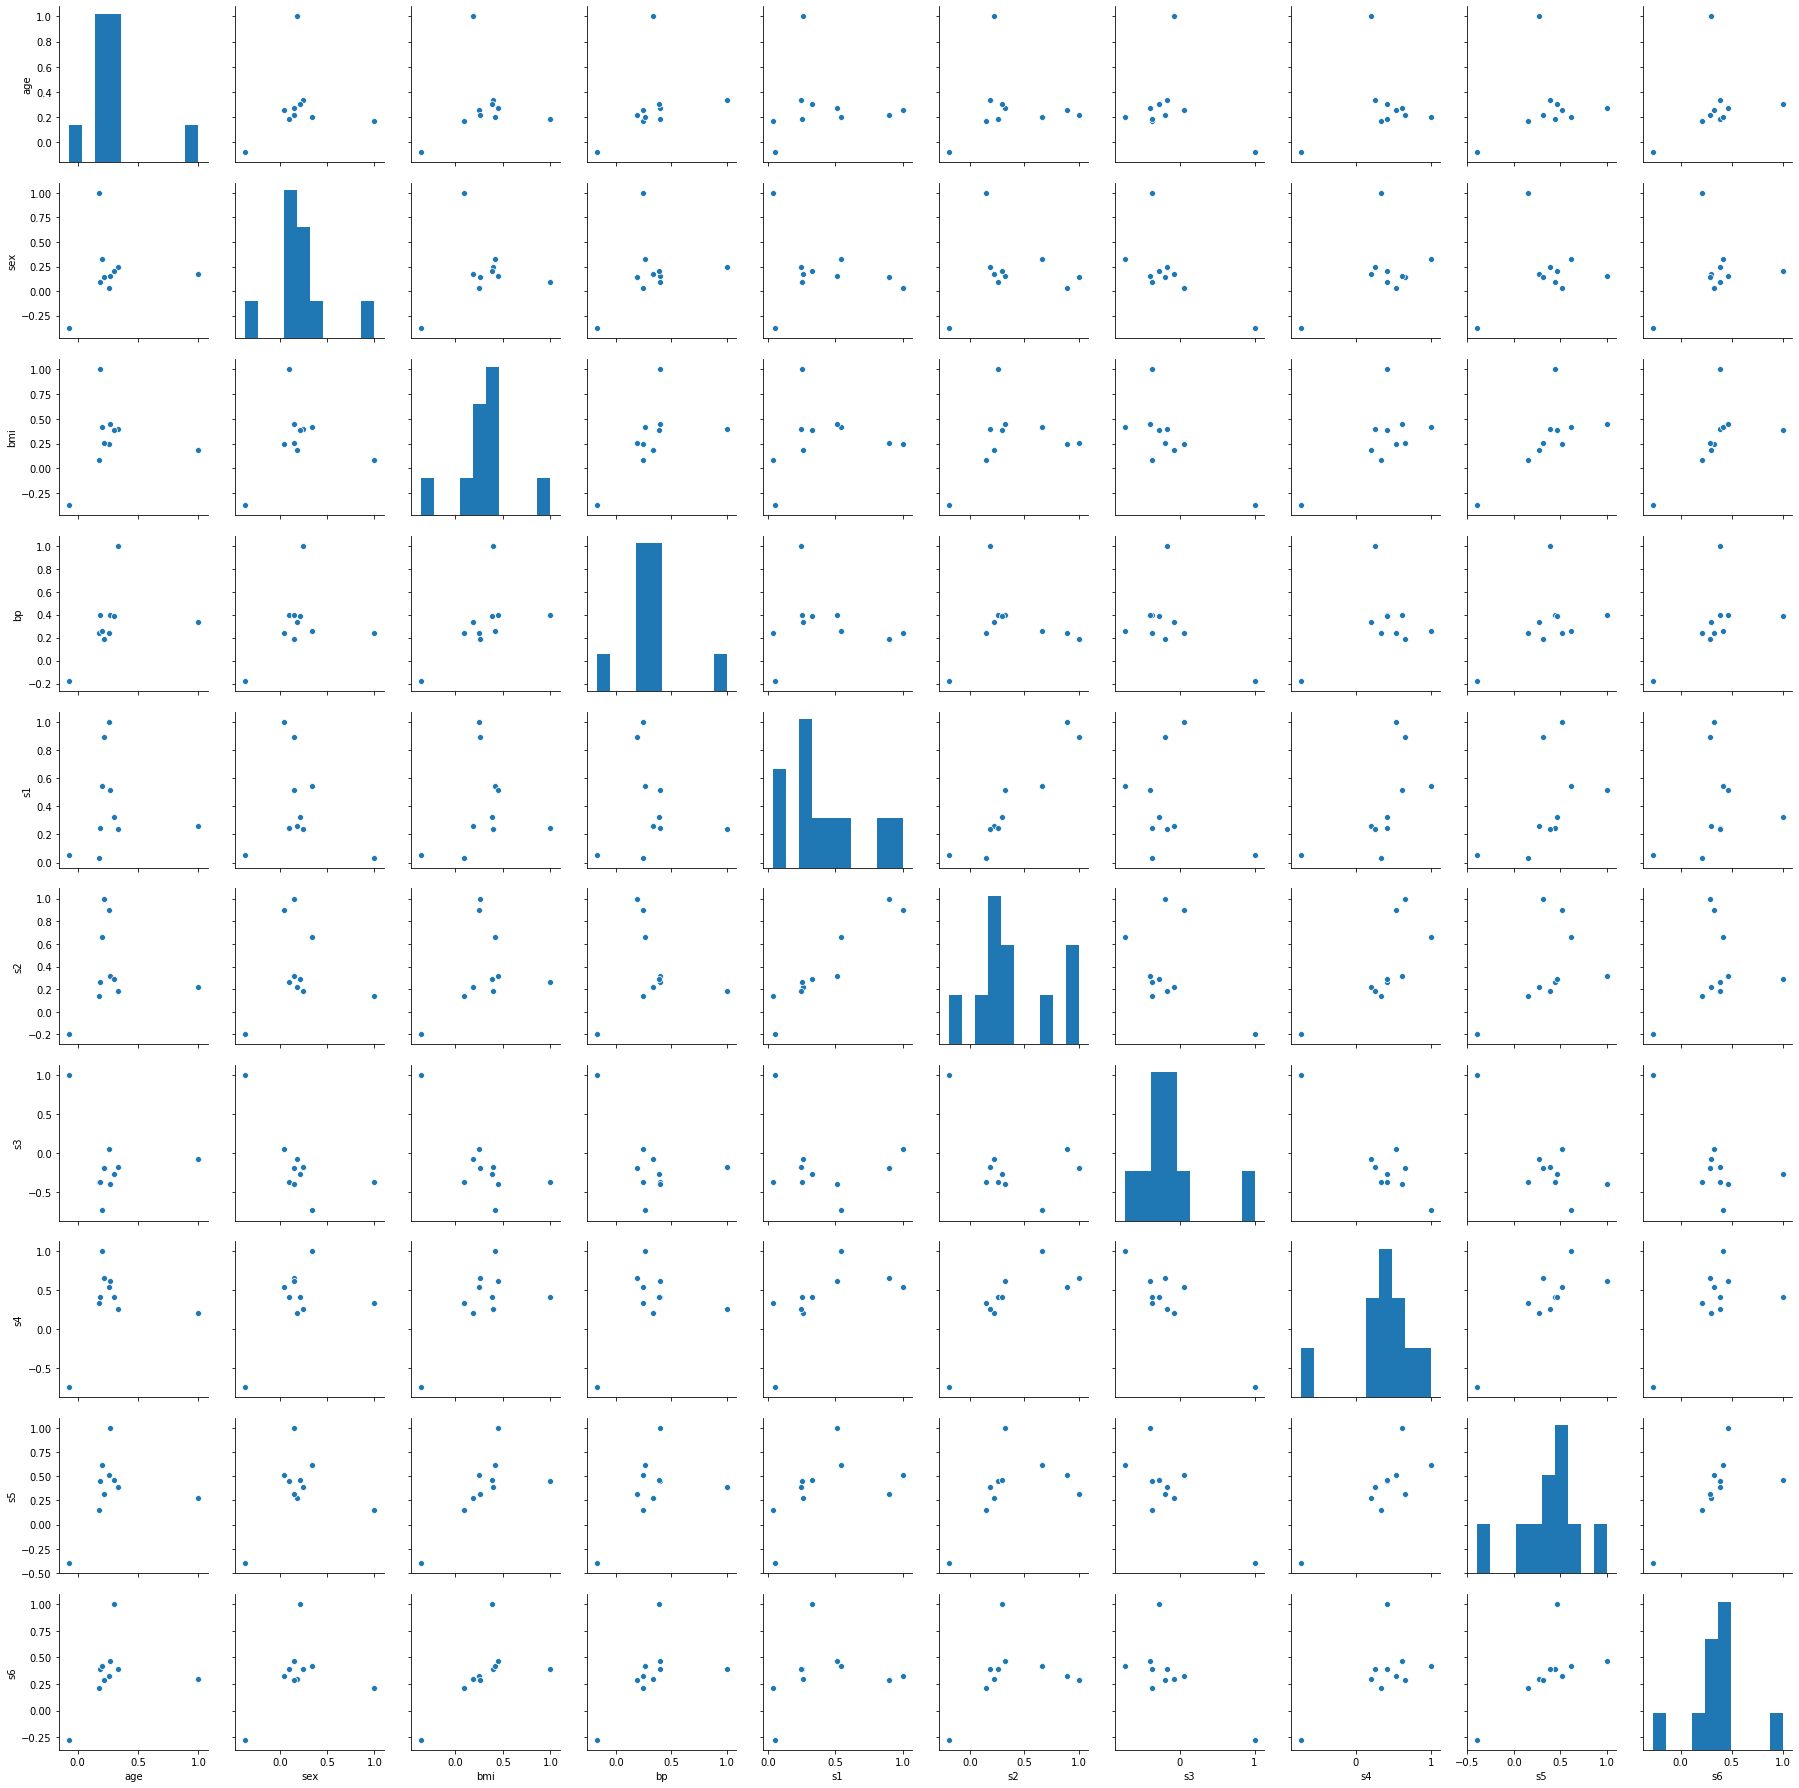

In [6]:
import seaborn as sns

sns.pairplot(df.corr())
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE

In [8]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.3)

In [25]:
def get_feature_ranking(alg, X, Y):
    selector = RFE(alg, step=1)
    selector = selector.fit(X, Y)
    return selector.ranking_
    
def evaluate(alg, train_X, train_Y, test_X, test_Y):
    alg.fit(train_X, train_Y)
    train_pred = alg.predict(train_X)
    train_rmse = np.sqrt(mean_squared_error(train_Y, train_pred))
    test_pred = alg.predict(test_X)
    test_rmse = np.sqrt(mean_squared_error(test_Y, test_pred))
    print(f'RMSE for train data = {train_rmse:10.5f}, for test data={test_rmse: 10.5f}')
    print(f'R^2 for train data = {r2_score(train_Y, train_pred):10.5f}, for test data={r2_score(test_Y, test_pred): 10.5f}')
    
    return train_pred, test_pred

def render(actual, pred):
    df = pd.DataFrame({'actual': actual, 'predicted': pred})
    df = pd.melt(df.reset_index(), id_vars=['index'], var_name='kind')
    return (ggplot(df, aes(x='index', y='value', color='kind'))
     + geom_line()
    )
    

In [26]:
m = LinearRegression()
ranking = get_feature_ranking(m, X_train, y_train)
# X_train = X_train[:, np.argwhere(ranking==1).reshape(-1)]
# X_test = X_train[:, np.argwhere(ranking==1).reshape(-1)]
train_pred, test_pred = evaluate(m, X_train, y_train, X_test, y_test)

RMSE for train data =   52.22549, for test data=  57.24918
R^2 for train data =    0.50736, for test data=   0.51377


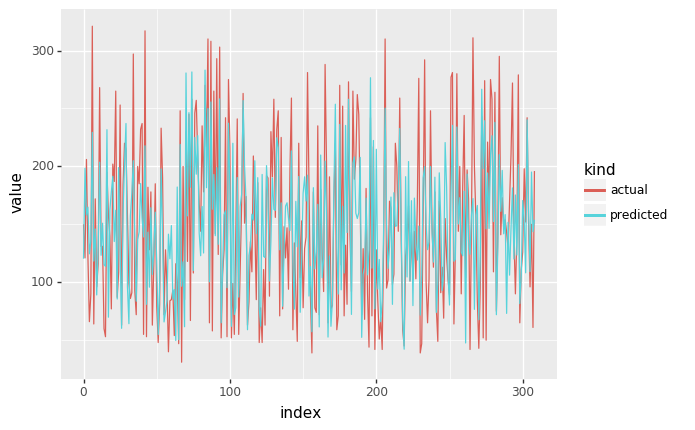

<ggplot: (-9223371861067684250)>

In [27]:
render(y_train, train_pred)

In [28]:
m = SVR()
train_pred, test_pred = evaluate(m, X_train, y_train, X_test, y_test)

RMSE for train data =   74.89082, for test data=  84.83702
R^2 for train data =   -0.01304, for test data=  -0.06775


d:\program files\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


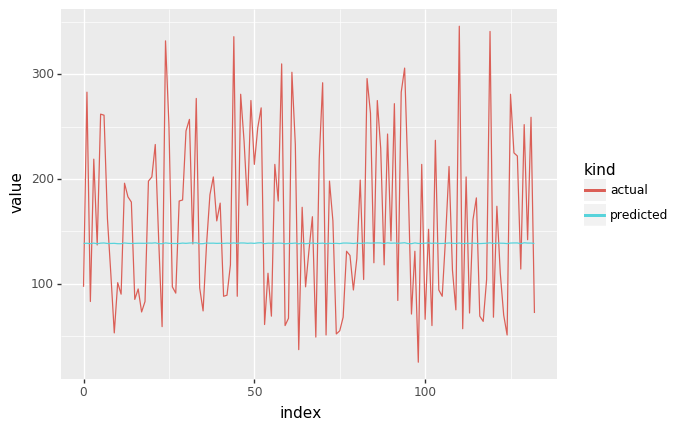

<ggplot: (175787122103)>

In [29]:
render(y_test, test_pred)

In [30]:
m = DecisionTreeRegressor()
train_pred, test_pred = evaluate(m, X_train, y_train, X_test, y_test)

RMSE for train data =    0.00000, for test data=  79.16415
R^2 for train data =    1.00000, for test data=   0.07027


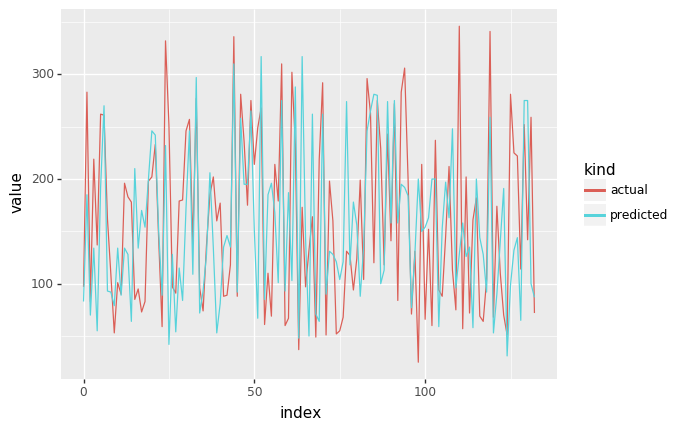

<ggplot: (-9223371861075174098)>

In [31]:
render(y_test, test_pred)

In [32]:
m = RandomForestRegressor()
train_pred, test_pred = evaluate(m, X_train, y_train, X_test, y_test)

RMSE for train data =   23.78623, for test data=  62.72301
R^2 for train data =    0.89781, for test data=   0.41635


d:\program files\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


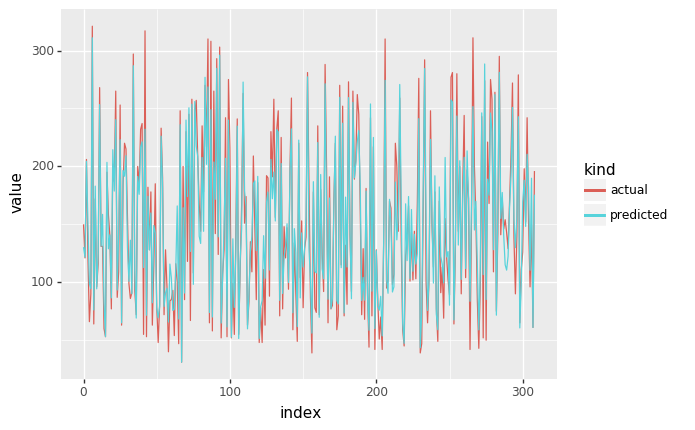

<ggplot: (175779532748)>

In [33]:
render(y_train, train_pred)

In [36]:
from keras.layers import Dense
from keras.models import Sequential

In [60]:
m = Sequential()
m.add(Dense(10, activation='relu'))
m.add(Dense(1, activation='relu'))

In [61]:
m.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [63]:
hist = m.fit(X_train, y_train, batch_size=100, epochs=100, validation_split=0.2, verbose=False)

In [65]:
df = pd.DataFrame({'loss': hist.history['loss'], 'val_loss': hist.history['val_loss']})
df = pd.melt(df.reset_index(), id_vars=['index'], var_name='dataset', value_name='loss')
df

,index,dataset,loss
0,0,loss,25914.662315
1,1,loss,25904.252475
2,2,loss,25893.550370
3,3,loss,25883.240835
4,4,loss,25872.609138
...,...,...,...
195,95,val_loss,29403.570312
196,96,val_loss,29384.007812
197,97,val_loss,29364.503906
198,98,val_loss,29344.675781


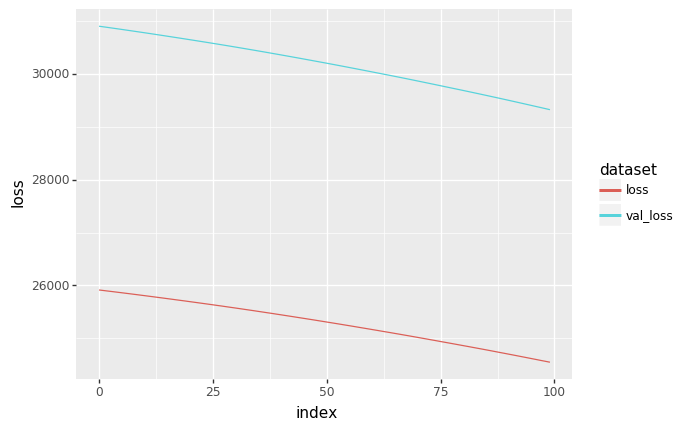

<ggplot: (175792193102)>

In [66]:
(ggplot(df, aes(x='index', y='loss', color='dataset'))
 + geom_line()
)

In [69]:
m.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [70]:
X_train.shape

(309, 10)